In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
import torch
import random
import matplotlib.pyplot as plt

In [0]:
df0 = pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset_wifi/P0-W0/Amp11.csv', header=None)
x_np0 = np.transpose(np.array(df0))
y_np0 = np.zeros(len(x_np0))

df1 = pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset_wifi/P1-W1/Amp11.csv', header=None)
x_np1 = np.transpose(np.array(df1))
y_np1 = np.ones(len(x_np1))

df2 = pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset_wifi/P9-W7/Amp11.csv', header=None)
x_np2 = np.transpose(np.array(df2))
y_np2 = np.ones(len(x_np2)) * 2

df3 = pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset_wifi/P14-W0/Amp11.csv', header=None)
x_np3 = np.transpose(np.array(df3))
y_np3 = np.ones(len(x_np3)) * 3

x_np = np.concatenate((x_np0, x_np1, x_np2, x_np3), axis=0)
y_np = np.concatenate((y_np0, y_np1, y_np2, y_np3), axis=0)
print(x_np.shape, y_np.shape)


data_length = x_np.shape[0]
data_id     = np.arange(0, data_length)
np.random.shuffle(data_id)

test_size = 0.2
train_id   = data_id[0:int(test_size*data_length)]
test_id    = data_id[int(test_size*data_length)::]

x_train     = x_np[train_id]
y_train     = y_np[train_id]
x_test      = x_np[test_id]
y_test      = y_np[test_id]

#target = pd.DataFrame(df['target'])
#del df['target']
train = torch.utils.data.TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train).type(torch.LongTensor))
train_loader = torch.utils.data.DataLoader(train, batch_size = 50, shuffle = True,
                                          drop_last=True)

(1671, 56) (1671,)


(373, 504)
(373, 9, 56)


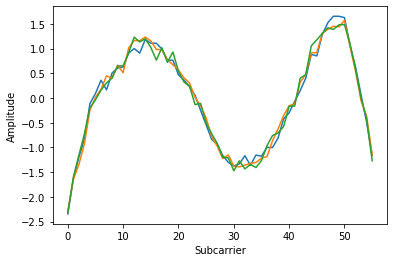

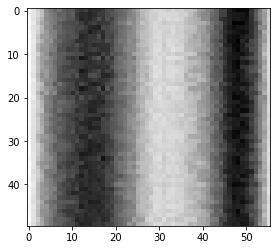

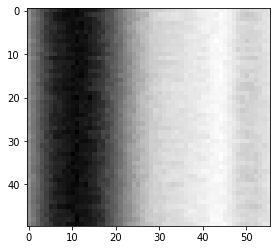

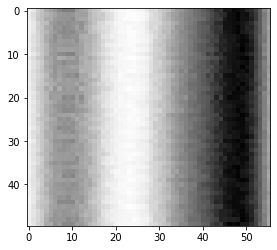

In [53]:
# Alternative way to load all CSV files in the folder at once
# For Class P0-W0 
import glob

path = r'/gdrive/My Drive/Colab Notebooks/dataset_wifi' # use your path
all_files = glob.glob(path + "/P0-W0/*.csv")

df0 = pd.concat((pd.read_csv(f, header=None) for f in all_files))
x_np0 = np.transpose(np.array(df0))
print(x_np0.shape)

x_np0 = x_np0.reshape(-1,9,56)  # batch_size x channels x data
print(x_np0.shape)

plt.plot(x_np0[0,0,:])
plt.plot(x_np0[1,0,:])
plt.plot(x_np0[2,0,:])
plt.xlabel("Subcarrier")
plt.ylabel("Amplitude")
plt.show()

# Show 2D matrix as a grey image
# Channel #1 [1,1]
plt.imshow(x_np0[0:50,0,:], cmap='Greys', interpolation='nearest')
plt.show()
# Channel #2 [1,2]
plt.imshow(x_np0[0:50,1,:], cmap='Greys', interpolation='nearest')
plt.show()
# Channel #2 [1,3]
plt.imshow(x_np0[0:50,2,:], cmap='Greys', interpolation='nearest')
plt.show()

(476, 504)
(476, 9, 56)


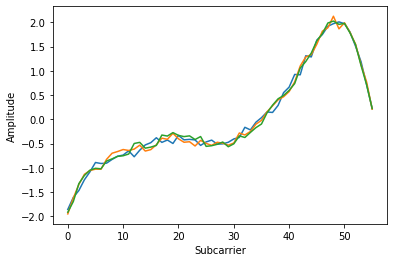

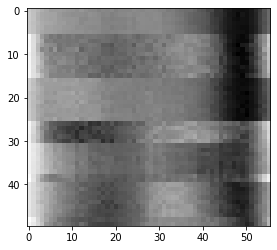

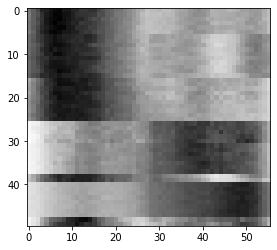

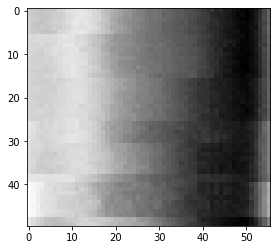

In [54]:
# Alternative way to load all CSV files in the folder at once
# For Class P9-W7 
import glob

path = r'/gdrive/My Drive/Colab Notebooks/dataset_wifi' # use your path
all_files = glob.glob(path + "/P9-W7/*.csv")

df2 = pd.concat((pd.read_csv(f, header=None) for f in all_files))
x_np2 = np.transpose(np.array(df2))
print(x_np2.shape)

x_np2 = x_np2.reshape(-1,9,56)  # batch_size x channels x data
print(x_np2.shape)

plt.plot(x_np2[0,0,:])
plt.plot(x_np2[1,0,:])
plt.plot(x_np2[2,0,:])
plt.xlabel("Subcarrier")
plt.ylabel("Amplitude")
plt.show()

# Show 2D matrix as a grey image
# Channel #1 [1,1]
plt.imshow(x_np2[0:50,0,:], cmap='Greys', interpolation='nearest')
plt.show()
# Channel #2 [1,2]
plt.imshow(x_np2[0:50,1,:], cmap='Greys', interpolation='nearest')
plt.show()
# Channel #2 [1,3]
plt.imshow(x_np2[0:50,2,:], cmap='Greys', interpolation='nearest')
plt.show()

In [37]:
a = np.arange(1,25)
a = a.reshape(-1,6)
print(a)
a.reshape(-1,2,3)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]


array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24]]])

In [0]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [0]:
# MLP Model 

linear1 = torch.nn.Linear(56, 50, bias=True)
linear2 = torch.nn.Linear(50, 30, bias=True)
linear3 = torch.nn.Linear(30, 4, bias=True)

# He initialization
torch.nn.init.kaiming_uniform_(linear1.weight, mode='fan_in', 
                               nonlinearity='leaky_relu') 
torch.nn.init.kaiming_uniform_(linear2.weight, mode='fan_in', 
                               nonlinearity='leaky_relu')
torch.nn.init.kaiming_uniform_(linear3.weight, mode='fan_in', 
                               nonlinearity='leaky_relu')

# Batch normalization
bn1 = torch.nn.BatchNorm1d(50)
bn2 = torch.nn.BatchNorm1d(30)


# 활성화함수 모듈을 생성
sigmoid = torch.nn.Sigmoid()
#relu = torch.nn.ReLU()
relu = torch.nn.LeakyReLU()

model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

#model = torch.nn.Sequential(linear1, bn1, relu, linear2, bn2, relu, linear3).to(device)

In [0]:
# CNN Model
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 56, 1)
        #    Conv     -> (?, 56, 32)
        #    Pool     -> (?, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU())
            #torch.nn.MaxPool1d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 32)
        #    Conv      ->(?, 14, 64)
        #    Pool      ->(?, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU())
            #torch.nn.MaxPool1d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 64)
        #    Conv      ->(?, 7, 128)
        #    Pool      ->(?, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU())
            #torch.nn.MaxPool1d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(56*128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.2))
        # L5 Final FC 625 inputs -> 4 outputs
        self.fc2 = torch.nn.Linear(625, 4, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

model = CNN().to(device)

In [0]:
# parameters
training_epochs = 1000

criterion = torch.nn.CrossEntropyLoss().to(device)  

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
#optimizer = torch.optim.Adamax(model.parameters(), lr=0.1)

# 학습
for epoch in range(training_epochs):

    avg_cost = 0
    total_batch = len(train_loader)

    for X, T in train_loader:
        X = X.view(-1, 56).to(device)
        #X = X.view(-1, 1, 56).to(device)
        T = T.to(device)
        #T = T.type(torch.LongTensor)


        optimizer.zero_grad()   # 기존 계산한 경사값 삭제
        output = model(X)       # 순방향 연산
        cost = criterion(output, T)   # 손실함수 설정
        cost.backward()         # 경사값 계산
        optimizer.step()        # 업데이트 1회 수행

        avg_cost += cost / total_batch     # 평균 손실함수값 계산

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning finished')

Epoch: 0001 cost = 1.095219731
Epoch: 0002 cost = 0.781136513
Epoch: 0003 cost = 0.659410834
Epoch: 0004 cost = 0.708148897
Epoch: 0005 cost = 0.552126825
Epoch: 0006 cost = 0.417722315
Epoch: 0007 cost = 0.391568750
Epoch: 0008 cost = 0.373745501
Epoch: 0009 cost = 0.368024200
Epoch: 0010 cost = 0.308039695
Epoch: 0011 cost = 0.296521068
Epoch: 0012 cost = 0.250112683
Epoch: 0013 cost = 0.270197928
Epoch: 0014 cost = 0.216259137
Epoch: 0015 cost = 0.250108480
Epoch: 0016 cost = 0.222010285
Epoch: 0017 cost = 0.252012849
Epoch: 0018 cost = 0.199501276
Epoch: 0019 cost = 0.201193839
Epoch: 0020 cost = 0.171650976
Epoch: 0021 cost = 0.218565911
Epoch: 0022 cost = 0.168746531
Epoch: 0023 cost = 0.188779071
Epoch: 0024 cost = 0.174903885
Epoch: 0025 cost = 0.176479027
Epoch: 0026 cost = 0.224016145
Epoch: 0027 cost = 0.185468107
Epoch: 0028 cost = 0.168087095
Epoch: 0029 cost = 0.156945050
Epoch: 0030 cost = 0.141564414
Epoch: 0031 cost = 0.181441694
Epoch: 0032 cost = 0.151012868
Epoch: 0

In [0]:
with torch.no_grad():
    
    X_test = torch.Tensor(x_test).to(device)
    T_test = torch.Tensor(y_test).to(device)

    # 테스트셋에 대해 추론 수행
    output = model(X_test)

    # 출력값이 가장 높은 뉴런의 인덱스와 정답을 비교, 맞으면 1, 틀리면 0
    correct_prediction = torch.argmax(output, 1) == T_test

    # 정확도 계산
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9768137335777283


Label:  2.0
Prediction:  2


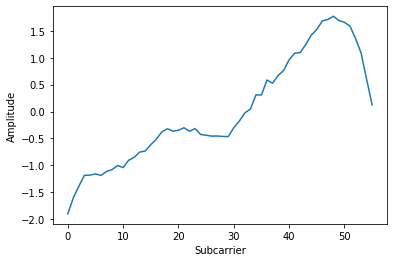

In [0]:
with torch.no_grad():
    # 테스트셋 중에 임의로 하나를 선택
    r = random.randint(0, len(x_test) - 1)    
    X_single_data = torch.Tensor(x_test[r,:]).float().to(device)
    T_single_data = y_test[r]

    print('Label: ', T_single_data.item())
    single_output = model(X_single_data)
    print('Prediction: ', torch.argmax(single_output, 0).item())

    # 선택된 테스트 신호패턴 출력
    plt.plot(x_test[r,:])
    plt.xlabel("Subcarrier")
    plt.ylabel("Amplitude")
    plt.show()